In [21]:
import rioxarray as rio
import geopandas as gpd

In [22]:
image = rio.open_rasterio("E:/geospatial-python/material/exercise_1/Image.tif")

In [23]:
print(image)

<xarray.DataArray (band: 4, y: 940, x: 766)>
[2880160 values with dtype=float64]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.082e+05 4.082e+05 4.082e+05 ... 4.09e+05 4.09e+05
  * y            (y) float64 4.606e+06 4.606e+06 ... 4.605e+06 4.605e+06
    spatial_ref  int32 0
Attributes:
    RepresentationType:  ATHEMATIC
    _FillValue:          0.0
    scale_factor:        1.0
    add_offset:          0.0


In [24]:
image_band1 = image.sel(band=1)  #(1)_(a)

In [25]:
image_band1

<xarray.DataArray (y: 940, x: 766)>
[720040 values with dtype=float64]
Coordinates:
    band         int32 1
  * x            (x) float64 4.082e+05 4.082e+05 4.082e+05 ... 4.09e+05 4.09e+05
  * y            (y) float64 4.606e+06 4.606e+06 ... 4.605e+06 4.605e+06
    spatial_ref  int32 0
Attributes:
    RepresentationType:  ATHEMATIC
    _FillValue:          0.0
    scale_factor:        1.0
    add_offset:          0.0

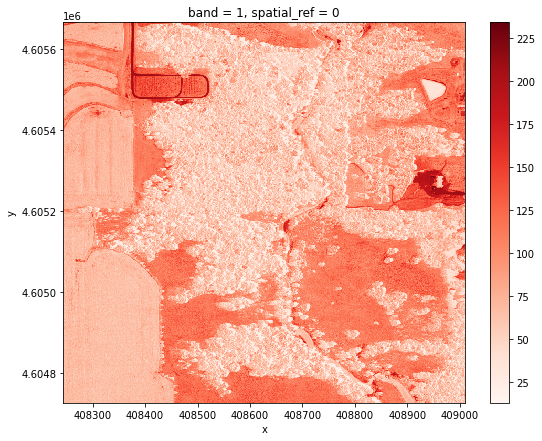

In [26]:
image_band1.plot.imshow(figsize=(9,7), cmap="Reds")

In [27]:
image_band2 = image.sel(band=2)

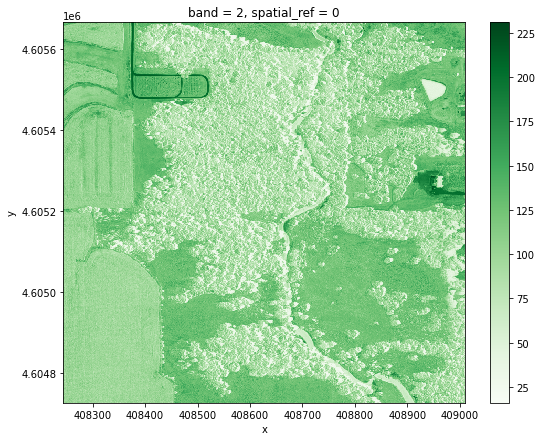

In [28]:
image_band2.plot.imshow(figsize=(9,7), cmap="Greens")

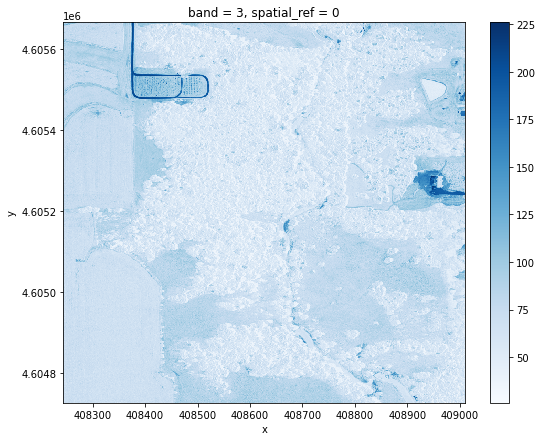

In [29]:
image_band3 = image.sel(band=3)
image_band3.plot.imshow(figsize=(9,7), cmap="Blues")

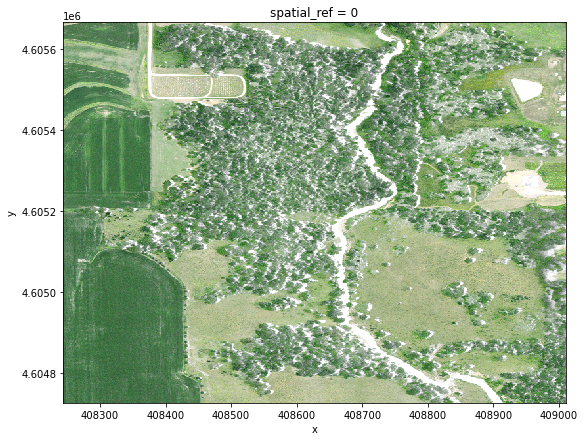

In [30]:
image.plot.imshow(figsize=(9,7), robust=True) #(1)_(b)

In [73]:
import rasterio
import numpy as np
from rasterio import crs
from rasterio.plot import show
from matplotlib import pyplot
import matplotlib.pyplot as plt    
from rasterio import plot as rioplot
from rasterio import features

In [74]:
streamline = gpd.read_file("E:/geospatial-python/material/exercise_1/clippedRefinedLines.shp")

<AxesSubplot:>

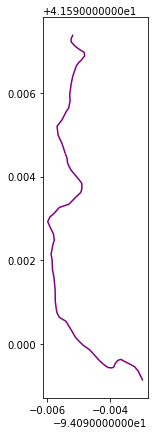

In [75]:
streamline.plot(figsize=(9,7), edgecolor="purple", facecolor="None")

In [88]:
from pyproj import crs

In [89]:
image = rio.open_rasterio("E:/geospatial-python/material/exercise_1/Image.tif")
streamline = gpd.read_file("E:/geospatial-python/material/exercise_1/clippedRefinedLines.shp")

In [96]:
streamline = streamline.to_crs(image.rio.crs)

<AxesSubplot:title={'center':'spatial_ref = 0'}, xlabel='x', ylabel='y'>

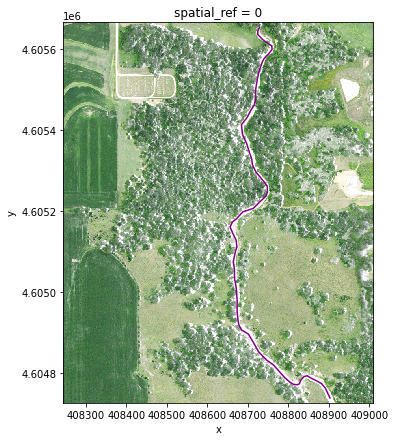

In [105]:
fig, ax = plt.subplots(figsize=(9,7))
image.plot.imshow(ax=ax, robust=True)
streamline.plot(ax=ax, edgecolor="purple", facecolor="None") #(1)_(b) with polyline on top of raster

In [106]:
print(image.rio.crs)
streamline.crs #(2)_(a)What are the spatial reference systems for both files

PROJCS["UTM_Zone_15_Northern_Hemisphere",GEOGCS["GCS_GRS_1980_IUGG_1980",DATUM["D_unknown",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


<Projected CRS: PROJCS["UTM_Zone_15_Northern_Hemisphere",GEOGCS["G ...>
Name: UTM_Zone_15_Northern_Hemisphere
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [110]:
print("Width:  ", image.rio.width, "pixels") 
print("Height: ", image.rio.height, "pixels")
print("Total: ", image.rio.width*image.rio.height, "pixels") #(2)_(b)

Width:   766 pixels
Height:  940 pixels
Total:  720040 pixels


In [111]:
print(image.rio.bounds())
streamline.bounds #(2)_(c)

(408244.0, 4604726.0, 409010.0, 4605666.0)


,minx,miny,maxx,maxy
0,408683.972356,4.605340e+06,408759.643340,4.605656e+06
1,408705.139065,4.605329e+06,408709.372406,4.605340e+06
2,408655.926466,4.604736e+06,408903.528203,4.605329e+06


In [117]:
print("bands:",image.shape[0]) #(2)_(d)

bands: 4


In [130]:
list = image.values
print(list[0:100]) #(2)_(e):What are the values of all bands for the first 100 pixels in the raster image 

[[[113. 111. 126. ...  95.  92. 104.]
  [116. 114. 136. ...  88.  80.  88.]
  [120. 103. 105. ...  82. 110.  85.]
  ...
  [ 81.  78.  63. ...  61.  61.  64.]
  [ 71.  66.  62. ...  74.  72.  56.]
  [ 73.  72.  66. ...  52.  58.  42.]]

 [[152. 152. 153. ... 130. 128. 130.]
  [145. 152. 157. ... 127. 125. 131.]
  [146. 132. 127. ... 123. 136. 123.]
  ...
  [105. 106. 101. ...  86.  94. 105.]
  [105. 106.  94. ... 110.  94.  80.]
  [110. 111.  97. ...  94.  85.  67.]]

 [[101. 100. 103. ...  74.  74.  78.]
  [ 97. 101. 114. ...  71.  71.  64.]
  [103.  97. 100. ...  67.  90.  70.]
  ...
  [ 71.  76.  71. ...  60.  61.  62.]
  [ 72.  71.  65. ...  69.  65.  55.]
  [ 72.  76.  72. ...  56.  57.  45.]]

 [[192. 198. 199. ... 160. 164. 175.]
  [192. 190. 173. ... 174. 176. 178.]
  [161. 154. 140. ... 175. 184. 195.]
  ...
  [189. 187. 191. ... 184. 172. 162.]
  [195. 194. 188. ... 183. 176. 137.]
  [192. 198. 191. ... 150. 144. 127.]]]


In [94]:
streamline.type #(2_(f):What is the spatial extent of the shapefile

0    LineString
1    LineString
2    LineString
dtype: object

In [136]:
streamline.columns

Index(['Id', 'geometry'], dtype='object')

In [137]:
streamline.bounds

,minx,miny,maxx,maxy
0,408683.972356,4.605340e+06,408759.643340,4.605656e+06
1,408705.139065,4.605329e+06,408709.372406,4.605340e+06
2,408655.926466,4.604736e+06,408903.528203,4.605329e+06


In [138]:
streamline.crs

<Projected CRS: PROJCS["UTM_Zone_15_Northern_Hemisphere",GEOGCS["G ...>
Name: UTM_Zone_15_Northern_Hemisphere
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [139]:
len(streamline)

3

In [19]:
import geopandas as gpd
streamline = gpd.read_file("E:/geospatial-python/material/exercise_1/clippedRefinedLines.shp")
streamline.values #B_(1)

array([[0,
       [0,
       [0,
      dtype=object)

In [12]:
import rasterio
import geopandas as gpd
image = rasterio.open("E:/geospatial-python/material/exercise_1/Image.tif")
streamline = gpd.read_file("E:/geospatial-python/material/exercise_1/clippedRefinedLines.shp")
allBands = image.read()
line = [streamline.loc[i,'geometry'] for i in range(3)]
vertex = [list(line[i].coords) for i in range(3)]
vertexNum = list(len(vertex[i]) for i in range(3))

In [13]:
import numpy as np

In [14]:
vertices = np.sum(vertexNum)

In [15]:
print(vertices) #(2)_(g):how many vertices in the shape file

74


In [16]:
streamline = gpd.read_file("E:/geospatial-python/material/exercise_1/clippedRefinedLines.shp")

In [18]:
import numpy as np
import pandas as pd 
import rasterio as rio
from rasterio import crs
from rasterio.plot import show
import geopandas as gpd
from matplotlib import pyplot

In [28]:
print("spatial coordinates ({row}, {column}): " .format(row=10, column=11),image.index(1, 1)) 
#(3):What is the spatial coordinates of the cell on the Xth row and Yth column? (test with X=10, Y=11)

spatial coordinates (10, 11):  (4605665, -408243)


In [66]:
streamline.values #B_(1):

array([[0,
       [0,
       [0,
      dtype=object)

In [58]:
buff_dist = 10
buffered_streamline = gpd.GeoDataFrame(geometry=[geom.buffer(buff_dist) for geom in streamline.geometry], crs=image.crs)

In [73]:
buffered_streamline.values #B_(2)

array([[<shapely.geometry.polygon.Polygon object at 0x0000028D291EAD90>],
      dtype=object)

In [59]:
shape = ((g, 1) for g in buffered_streamline.geometry)

In [60]:
from rasterio import features

In [61]:
image_streamline = features.rasterize(shape,out_shape = (image.height,image.width),transform = image.transform, all_touched=True, fill = 0, default_value=1)

In [62]:
import matplotlib.pyplot as plt 

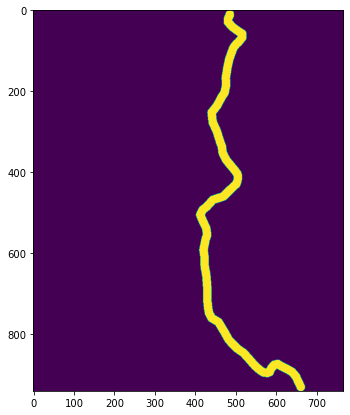

In [65]:
fig, ax = plt.subplots(figsize=(9, 7))
pyplot.imshow(image_streamline)
pyplot.show() #B_(3)

In [90]:
shape = ((g, 1) for g in buffered_streamline.geometry)
from rasterio import features

In [91]:
image_streamline = features.rasterize(shape,out_shape = (image.height,image.width),transform = image.transform, all_touched=True, fill = 0, default_value=1)

In [92]:
image = rasterio.open("E:/geospatial-python/material/exercise_1/Image.tif")
streamline = gpd.read_file("E:/geospatial-python/material/exercise_1/clippedRefinedLines.shp")

allBands = image.read()
red = allBands[3,:,:]
red = red.astype(int)
red.shape =  red.shape[0]*red.shape[1]
green = allBands[2,:,:]
green = green.astype(int)
green.shape = green.shape[0]*green.shape[1]
blue = allBands[1,:,:]
blue = blue.astype(int)
blue.shape = blue.shape[0]*blue.shape[1]
nir = allBands[0,:,:]
nir = nir.astype(int)
nir.shape = nir.shape[0]*nir.shape[1]

image_streamline.shape = image_streamline.shape[0]*image_streamline.shape[1]
image_streamline = image_streamline.astype(bool)
d = {'Red': red, 'Green':green, 'blue': blue, 'NIR': nir, 'Class': image_streamline}
df = pd.DataFrame(d)
df.head(100) #B_(4)

,Red,Green,blue,NIR,Class
0,192,101,152,113,False
1,198,100,152,111,False
2,199,103,153,126,False
3,196,107,151,125,False
4,188,101,150,120,False
...,...,...,...,...,...
95,179,73,101,77,False
96,165,71,99,71,False
97,158,79,108,85,False
98,168,73,106,83,False


In [3]:
import rasterio
import geopandas as gpd
image = rasterio.open("E:/geospatial-python/material/exercise_1/Image.tif")
streamline = gpd.read_file("E:/geospatial-python/material/exercise_1/clippedRefinedLines.shp")

In [4]:
import numpy as np

In [5]:
data = image.read()

In [13]:
import rioxarray as rio
image = rio.open_rasterio("E:/geospatial-python/material/exercise_1/Image.tif")
import numpy as np

In [14]:
h=224
w=224
data=np.array(data[:,:w,:h])

In [15]:
print(data.shape)

(4, 224, 224)


In [16]:
import rasterio
image = rasterio.open("E:/geospatial-python/material/exercise_1/Image.tif")
rgb_stack = image.read()

In [17]:
h=224
w=224
rgb_stack=np.array(rgb_stack[:,:w,:h])

In [18]:
red = rgb_stack[3,:,:]
red = red.astype(int)
green = rgb_stack[2,:,:]
green = green.astype(int)
blue = rgb_stack[1,:,:]
blue = blue.astype(int)
rgb = np.dstack([red,green,blue])

In [19]:
newshape=[1,224,224,4]

In [20]:
data = np.reshape(rgb_stack,newshape)

In [21]:
print(data.shape) #(C)_(1)

(1, 224, 224, 4)


In [23]:
shape = ((g, 1) for g in streamline.geometry)

In [26]:
from rasterio import features

In [28]:
image_streamline = features.rasterize(shape,out_shape = (image.height,image.width),transform = image.transform, all_touched=True, fill = 0, default_value=1)

In [31]:
import numpy as np
h=224
w=224
image_streamline=np.array(image_streamline[:w,:h])

In [32]:
print(image_streamline.shape) #(C)_(2)

(224, 224)
